##Test out UGRID-0.9 compliant unstructured grid model datasets with PYUGRID

In [1]:
from __future__ import (absolute_import, division, print_function)

import matplotlib.tri as tri
import datetime as dt

In [2]:
import cartopy.crs as ccrs
import iris
iris.FUTURE.netcdf_promote = True
import pyugrid

In [3]:
#ADCIRC
#url =  'http://comt.sura.org/thredds/dodsC/data/comt_1_archive/inundation_tropical/UND_ADCIRC/Hurricane_Ike_3D_final_run_with_waves'

#FVCOM
#url = 'http://www.smast.umassd.edu:8080/thredds/dodsC/FVCOM/NECOFS/Forecasts/NECOFS_GOM3_FORECAST.nc'

#SELFE
url = 'http://comt.sura.org/thredds/dodsC/data/comt_1_archive/inundation_tropical/VIMS_SELFE/Hurricane_Ike_2D_final_run_with_waves'


In [4]:
cube = iris.load_cube(url,'sea_surface_height_above_geoid')

/home/usgs/anaconda/lib/python2.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1195: UserWarning: Ignoring netCDF variable 'ele' invalid units 'non-dimensional'
  warnings.warn(msg.format(msg_name, msg_units))
/home/usgs/anaconda/lib/python2.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1195: UserWarning: Ignoring netCDF variable 'Cs' invalid units 'non-dimensional'
  warnings.warn(msg.format(msg_name, msg_units))
/home/usgs/anaconda/lib/python2.7/site-packages/iris/fileformats/_pyke_rules/compiled_krb/fc_rules_cf_fc.py:1195: UserWarning: Ignoring netCDF variable 'sigma' invalid units 'non-dimensional'
  warnings.warn(msg.format(msg_name, msg_units))


In [5]:
print(cube)

sea_surface_height_above_geoid / (m) (time: 120; -- : 592761)
     Dimension coordinates:
          time                            x         -
     Auxiliary coordinates:
          latitude                        -         x
          longitude                       -         x
     Attributes:
          Conventions: CF-1.0
          NCO: 4.0.8
          cdm_data_type: ugrid
          comment: David Forrest drf@vims.edu 2012-12-13
          history: ncml aggregation of .../whole_domain/ datafiles
          id: inundation_tropical.VIMS_SELFE.Hurricane_Ike_2D_final_run_with_waves
          institution: Virginia Institute of Marine Science -- http://web.vims.edu/physical/
          location: node
          mesh: selfe_mesh
          nco_openmp_thread_number: 1
          references: testbed.sura.org:/data/ftp/upload/Inundation/vims/selfe_tropical/runs/Ike/2D_varied_manning_windstress/new_10min/Inundation_Model_Metadata_Template_v3_for_2D_windstress_sv_Ike_10min.docx...
          source: S

In [6]:
# Desired time for snapshot
# ....right now (or some number of hours from now) ...
start = dt.datetime.utcnow() + dt.timedelta(hours=6)
# ... or specific time (UTC)
#start = dt.datetime(2013,3,2,15,0,0)

In [7]:
ug = pyugrid.UGrid.from_ncfile(url)

# What's in there?
#print("There are %i nodes"%ug.nodes.shape[0])
#print("There are %i edges"%ug.edges.shape[0])
#print("There are %i faces"%ug.faces.shape[0])

In [8]:
cube.mesh = ug
cube.mesh_dimension = 1  # (0:time,1:node)

In [9]:
lon = cube.mesh.nodes[:,0]
lat = cube.mesh.nodes[:,1]
nv = cube.mesh.faces

In [10]:
triang = tri.Triangulation(lon,lat,triangles=nv)

In [11]:
# skip trying to find the closest time index to requested time, because it's messy
ind = -1 # just take the last time index for now
zcube = cube[ind]

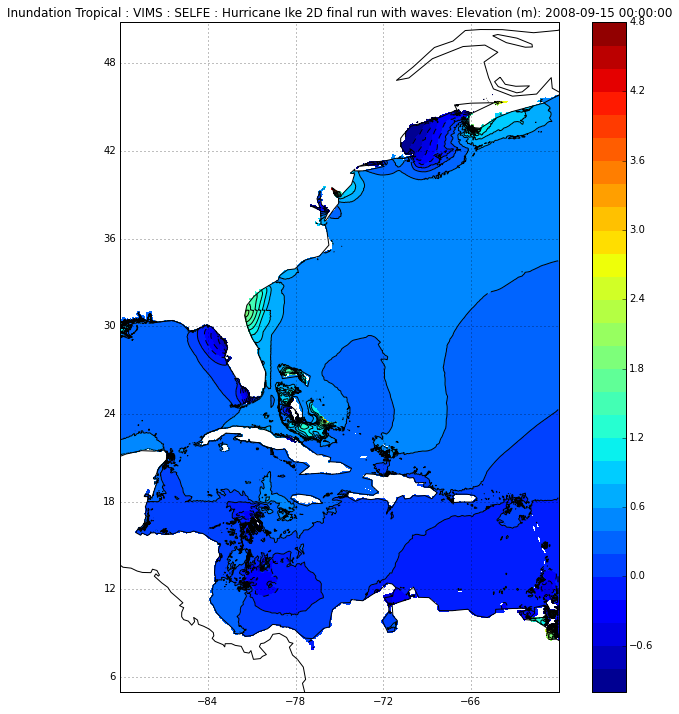

In [12]:
figure(figsize=(12,12))
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-90, -60, 5, 50])
ax.coastlines()
levs=arange(-1,5,.2)
tricontourf(triang, zcube.data, levels=levs)
colorbar()
tricontour(triang, zcube.data, colors='k',levels=levs)
tvar = cube.coord('time')
tstr = tvar.units.num2date(tvar.points[ind])
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_right = False
title('%s: Elevation (m): %s' % (zcube.attributes['title'],tstr));